<a href="https://colab.research.google.com/github/anupojuharshita/Lane-Detection/blob/main/VGG%2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving combined_dataset (1).zip to combined_dataset (1).zip


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

# Unzip the dataset
import zipfile

zip_path = "/content/combined_dataset (1).zip"
extract_path = "/content/combined_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Read and split images
input_images, target_images = [], []
for fname in os.listdir(extract_path):
    path = os.path.join(extract_path, fname)
    img = cv2.imread(path)
    if img is None or img.shape[1] % 2 != 0:
        continue
    h, w = img.shape[:2]
    mid = w // 2
    input_img = img[:, :mid]
    target_img = img[:, mid:]

    input_images.append(cv2.resize(input_img, (128, 128)) / 255.0)
    target_images.append(cv2.resize(target_img, (128, 128)) / 255.0)

X = np.array(input_images)
Y = np.array(target_images)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input

def build_vgg16_model(input_shape=(128, 128, 3)):
    # Encoder: Pretrained VGG16
    vgg = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in vgg.layers:
        layer.trainable = False  # freeze encoder

    encoder_output = vgg.output

    # Decoder
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(encoder_output)
    x = UpSampling2D()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = UpSampling2D(size=(2,2))(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = UpSampling2D(size=(2,2))(x)
    output = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(x)

    model = Model(inputs=vgg.input, outputs=output)
    return model

model = build_vgg16_model()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 32, 32, 128)    │             

 Total params: 18,642,563 (71.12 MB)

 Trainable params: 3,927,875 (14.98 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=10,
    batch_size=16
)


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 722ms/step - accuracy: 0.3596 - loss: 0.0616 - val_accuracy: 0.4387 - val_loss: 0.0244
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.4581 - loss: 0.0224 - val_accuracy: 0.4926 - val_loss: 0.0182
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5143 - loss: 0.0176 - val_accuracy: 0.5215 - val_loss: 0.0152
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5484 - loss: 0.0151 - val_accuracy: 0.5867 - val_loss: 0.0131
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5944 - loss: 0.0126 - val_accuracy: 0.6027 - val_loss: 0.0125
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6166 - loss: 0.0118 - val_accuracy: 0.6424 - val_loss: 0.0113
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6407 - loss: 0.0112 - val_accuracy: 0.6384 - val_loss: 0.0108
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6513 - loss: 0.0100 - val_accuracy: 0.6476 -

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.6687 - loss: 0.0104
Pixel-wise Accuracy: 66.78%
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


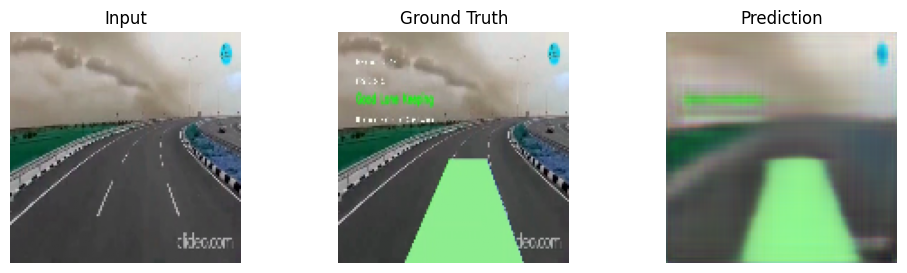

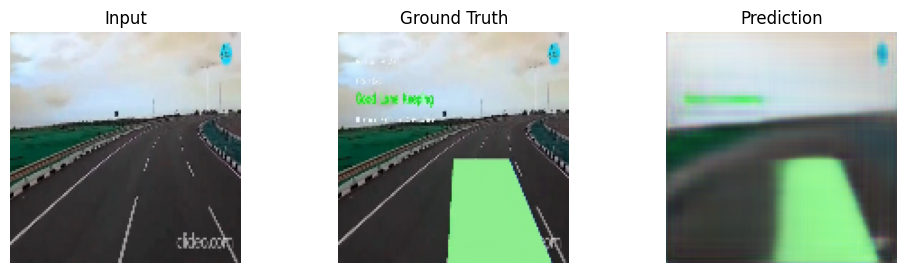

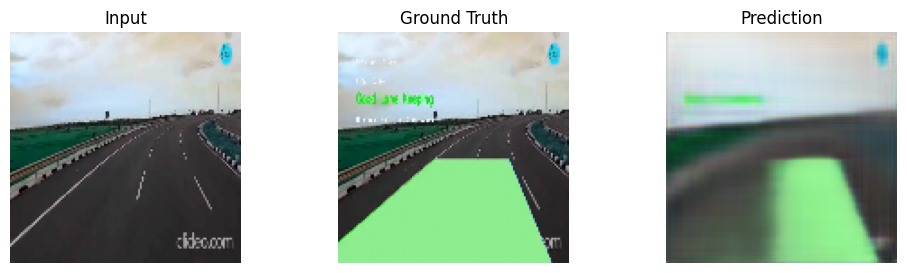

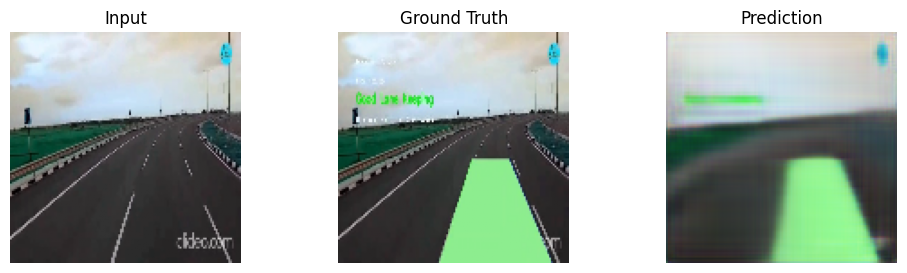

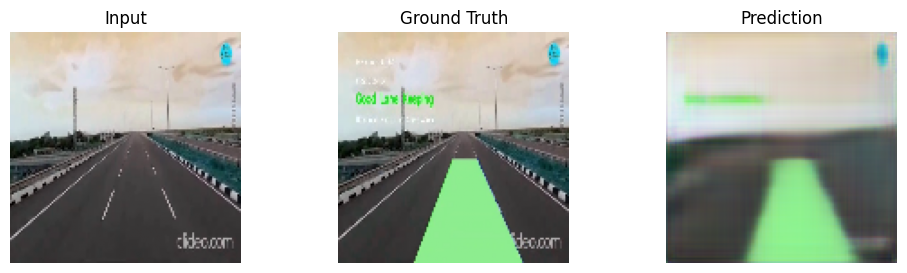

In [ ]:
# Evaluate
loss, acc = model.evaluate(X_test, Y_test)
print(f"Pixel-wise Accuracy: {acc * 100:.2f}%")

# Show Predictions
n = 5
preds = model.predict(X_test[:n])
for i in range(n):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    plt.title("Input")
    plt.imshow(X_test[i])
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Ground Truth")
    plt.imshow(Y_test[i])
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Prediction")
    plt.imshow(preds[i])
    plt.axis("off")
    plt.show()


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

# Unzip the dataset
import zipfile

zip_path = "/content/combined_dataset (1).zip"
extract_path = "/content/combined_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Read and split images
input_images, target_images = [], []
for fname in os.listdir(extract_path):
    path = os.path.join(extract_path, fname)
    img = cv2.imread(path)
    if img is None or img.shape[1] % 2 != 0:
        continue
    h, w = img.shape[:2]
    mid = w // 2
    input_img = img[:, :mid]
    target_img = img[:, mid:]

    input_images.append(cv2.resize(input_img, (128, 128)) / 255.0)
    target_images.append(cv2.resize(target_img, (128, 128)) / 255.0)

X = np.array(input_images)
Y = np.array(target_images)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input

def build_vgg16_model(input_shape=(128, 128, 3)):
    # Encoder: Pretrained VGG16
    vgg = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in vgg.layers:
        layer.trainable = False  # freeze encoder

    encoder_output = vgg.output

    # Decoder
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(encoder_output)
    x = UpSampling2D()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = UpSampling2D(size=(2,2))(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = UpSampling2D(size=(2,2))(x)
    output = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(x)

    model = Model(inputs=vgg.input, outputs=output)
    return model

model = build_vgg16_model()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_15 (UpSampling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_16 (UpSampling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_17 (UpSampling2D) │ (None, 32, 32, 128)    │             

 Total params: 18,642,563 (71.12 MB)

 Trainable params: 3,927,875 (14.98 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=16
)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7341 - loss: 0.0047 - val_accuracy: 0.7428 - val_loss: 0.0065
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7325 - loss: 0.0044 - val_accuracy: 0.7413 - val_loss: 0.0062
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7356 - loss: 0.0043 - val_accuracy: 0.7193 - val_loss: 0.0061
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7342 - loss: 0.0041 - val_accuracy: 0.7202 - val_loss: 0.0059
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7292 - loss: 0.0041 - val_accuracy: 0.7419 - val_loss: 0.0059
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7397 - loss: 0.0040 - val_accuracy: 0.7422 - val_loss: 0.0059
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7342 - loss: 0.0039 - val_accuracy: 0.7397 - val_loss: 0.0059
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7406 - loss: 0.0039 - val_accuracy: 0.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7660 - loss: 0.0055
Pixel-wise Accuracy: 76.44%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


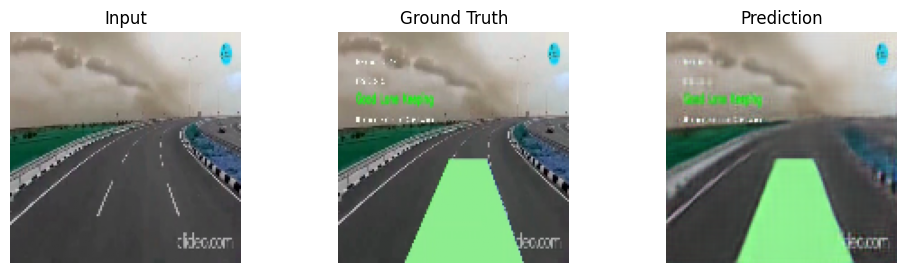

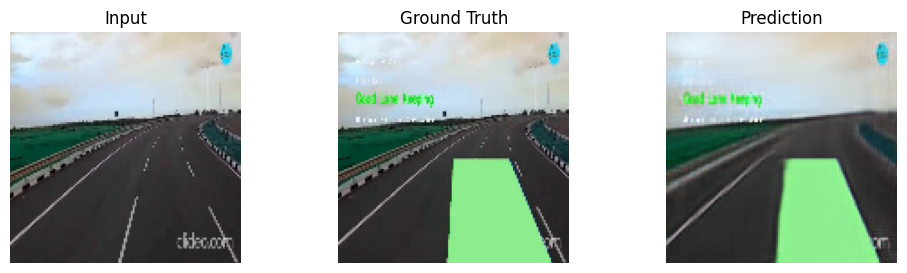

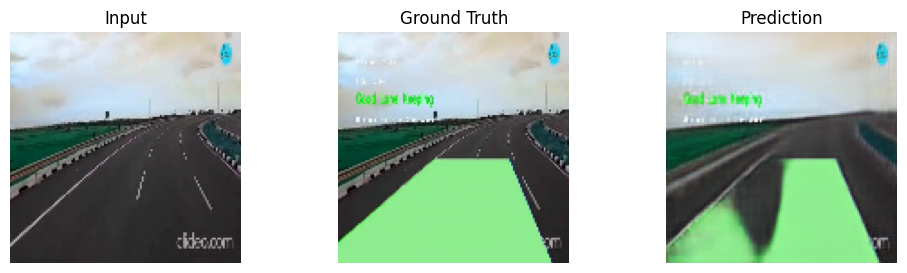

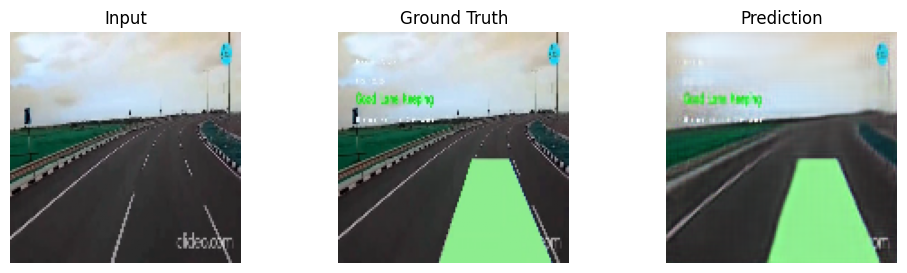

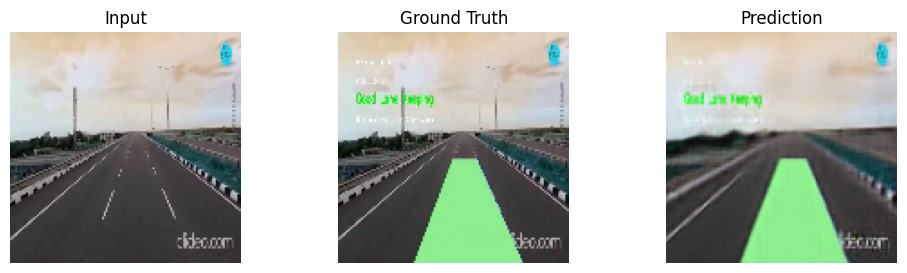

In [ ]:
# Evaluate
loss, acc = model.evaluate(X_test, Y_test)
print(f"Pixel-wise Accuracy: {acc * 100:.2f}%")

# Show Predictions
n = 5
preds = model.predict(X_test[:n])
for i in range(n):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    plt.title("Input")
    plt.imshow(X_test[i])
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Ground Truth")
    plt.imshow(Y_test[i])
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Prediction")
    plt.imshow(preds[i])
    plt.axis("off")
    plt.show()


In [ ]:
def plot_multiple_predictions(model, X_test, Y_test, num_frames=10):
    preds = model.predict(X_test[:num_frames])

    for i in range(num_frames):
        plt.figure(figsize=(12, 3))

        # Input
        plt.subplot(1, 3, 1)
        plt.imshow(X_test[i])
        plt.title("Input")
        plt.axis("off")

        # Ground Truth
        plt.subplot(1, 3, 2)
        plt.imshow(Y_test[i])
        plt.title("Ground Truth")
        plt.axis("off")

        # Prediction
        plt.subplot(1, 3, 3)
        plt.imshow(preds[i])
        plt.title("Prediction")
        plt.axis("off")

        plt.tight_layout()
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


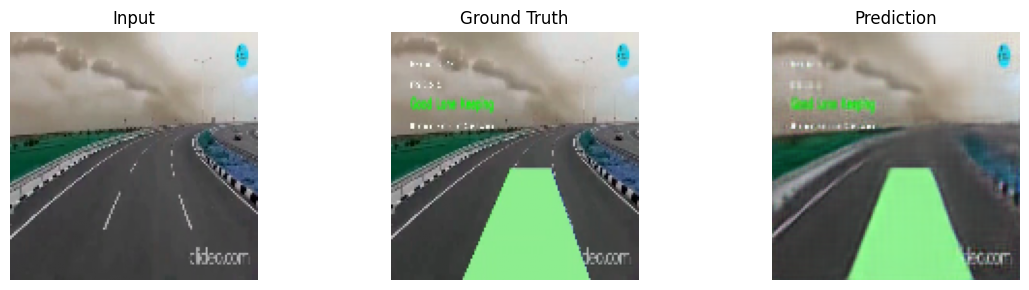

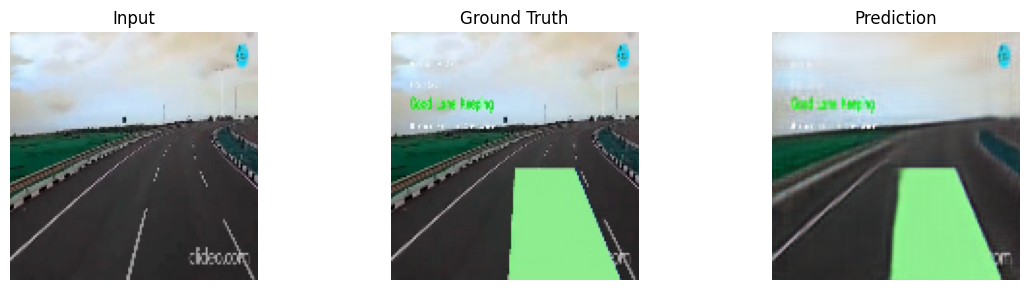

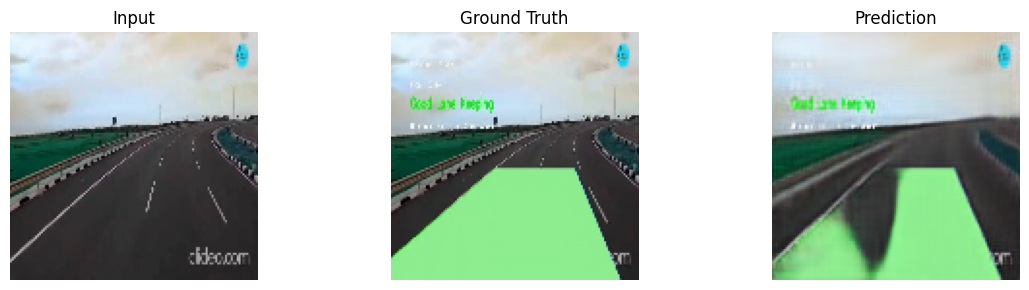

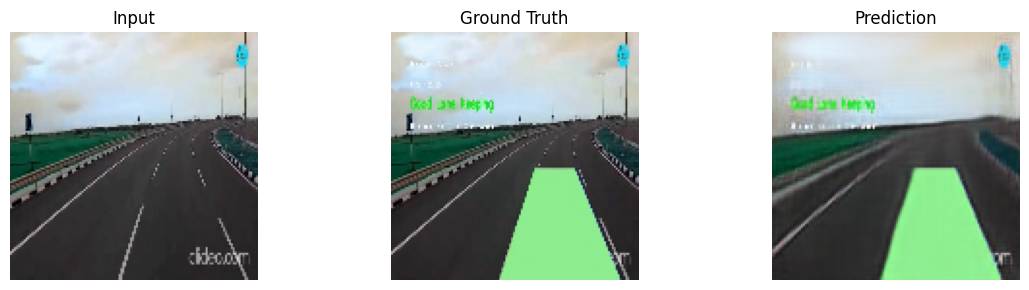

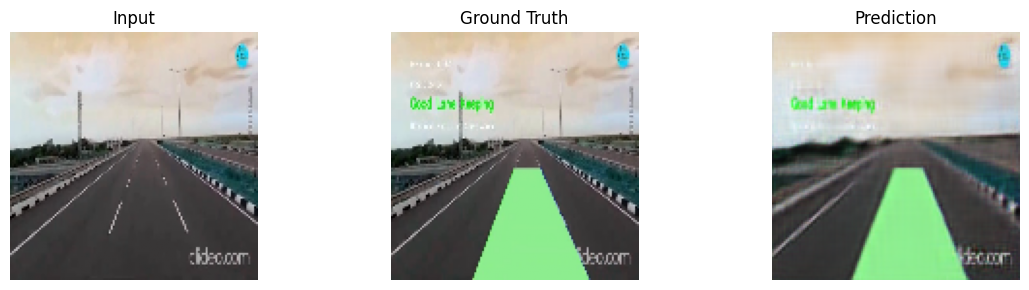

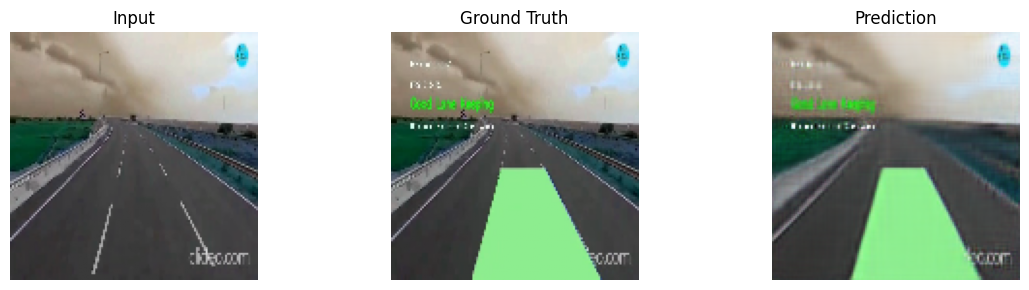

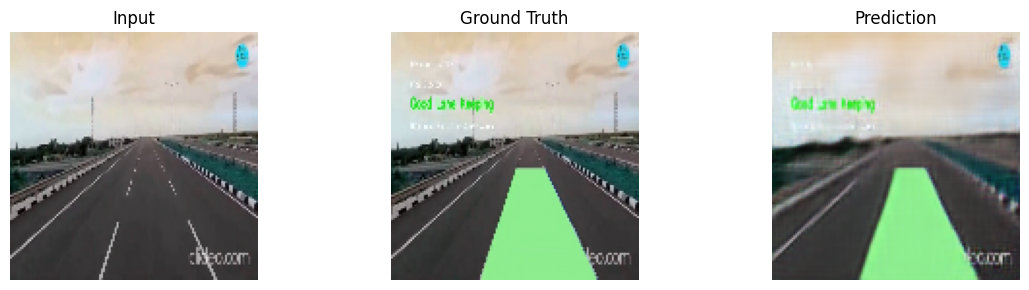

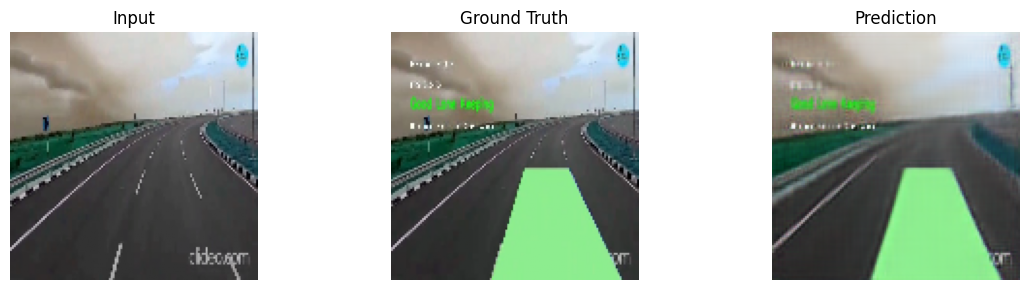

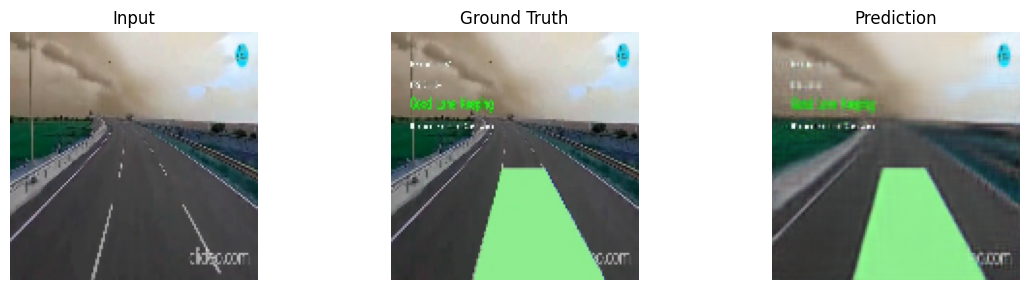

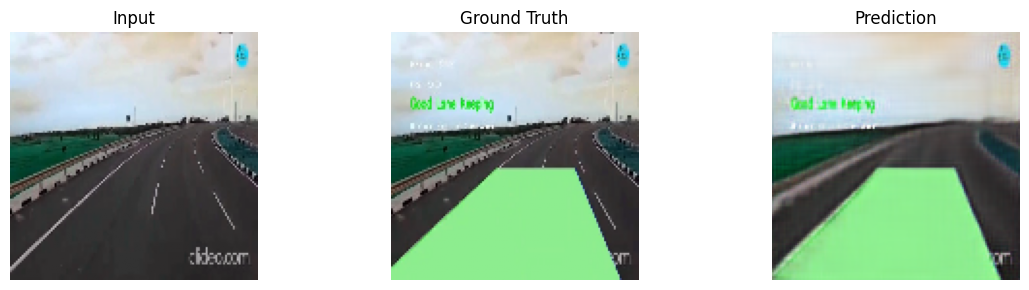

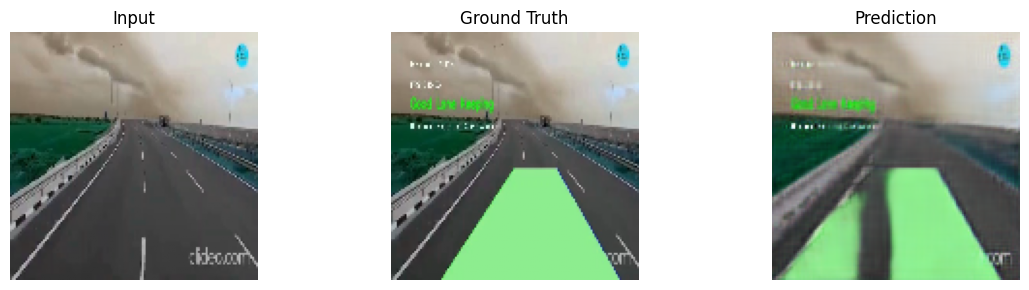

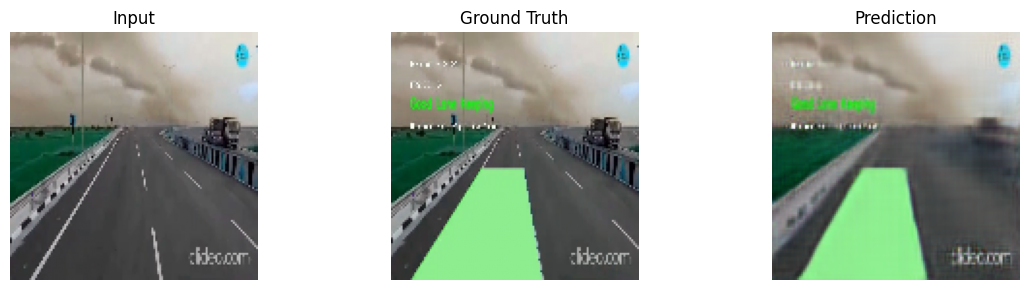

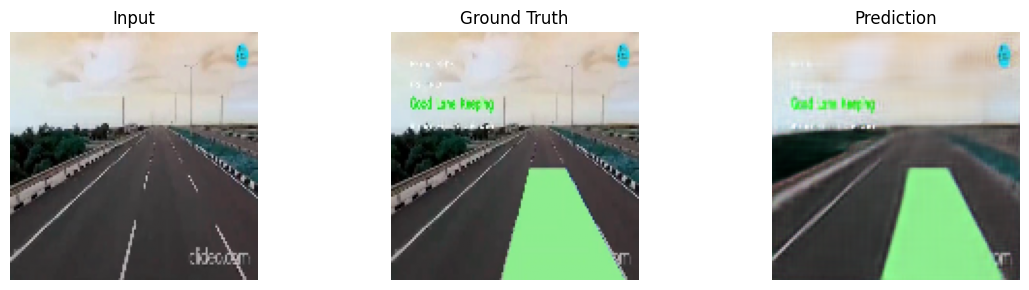

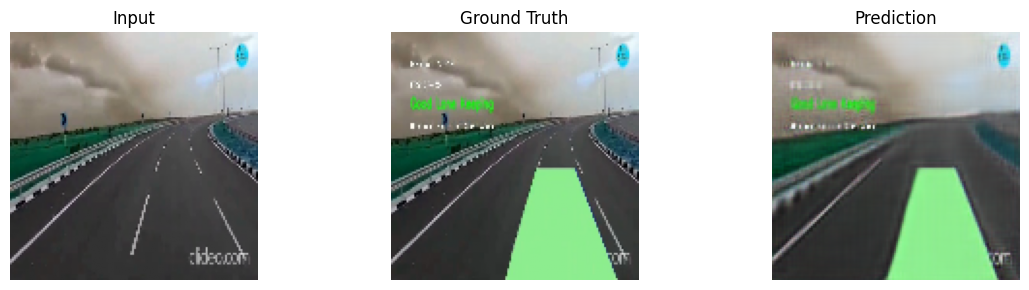

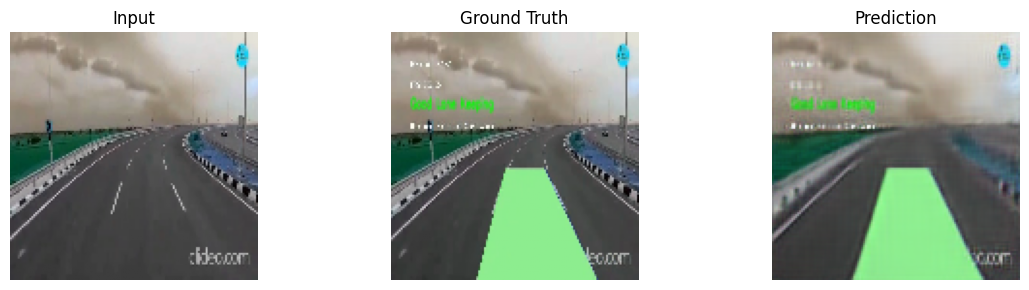

In [ ]:
plot_multiple_predictions(model, X_test, Y_test, num_frames=15)
